<a href="https://colab.research.google.com/github/KaanErdogdu/7_Bootcamo_Siniflandirma_Problemleri/blob/master/Odev__7_5_Lojistik_Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
titanic_s = pd.read_csv('titanic_train.csv')
titanic_s.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
##titanic_s=titanic.merge(titanic_ss,on="PassengerId",how="left")
##titanic_s.head()

In [ ]:
titanic_sss= titanic_s[["Sex","Age","SibSp","Parch","Ticket","Fare","Survived"]]

titanic_s.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_sss["kadin_mi"] = pd.get_dummies(titanic_s.Sex, drop_first=True)
titanic_sss.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sex,Age,SibSp,Parch,Ticket,Fare,Survived,kadin_mi
0,male,22.0,1,0,A/5 21171,7.2500,0,1
1,female,38.0,1,0,PC 17599,71.2833,1,0
2,female,26.0,0,0,STON/O2. 3101282,7.9250,1,0
3,female,35.0,1,0,113803,53.1000,1,0
4,male,35.0,0,0,373450,8.0500,0,1


In [ ]:
titanic_s2=titanic_sss[["kadin_mi","Age","SibSp","Parch","Fare","Survived"]]
titanic_s2.head()

,kadin_mi,Age,SibSp,Parch,Fare,Survived
0,1,22.0,1,0,7.2500,0
1,0,38.0,1,0,71.2833,1
2,0,26.0,0,0,7.9250,1
3,0,35.0,1,0,53.1000,1
4,1,35.0,0,0,8.0500,0


In [ ]:
titanic_s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kadin_mi  891 non-null    uint8  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Survived  891 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 35.8 KB


In [ ]:
titanic_s2.isnull().sum()

kadin_mi      0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [ ]:
#Age boş ise o satırı sil nasıl yapılıyordu

In [ ]:
titanic_s3=titanic_s2.dropna(subset=["Age","Fare"])
titanic_s3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kadin_mi  714 non-null    uint8  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
 5   Survived  714 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 34.2 KB


In [ ]:
##titanic_s2["Age"].fillna(titanic_s2["Age"].mean(), inplace=True)


In [ ]:
titanic_s3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kadin_mi  714 non-null    uint8  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
 5   Survived  714 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 34.2 KB


In [ ]:
#X = titanic_s2[["kadin_mi","Age","Ticket"]]
X = titanic_s3[["Age","Fare","kadin_mi"]]
y = titanic_s3.Survived
print(X[:5])
print(y[:5])

    Age     Fare  kadin_mi
0  22.0   7.2500         1
1  38.0  71.2833         0
2  26.0   7.9250         0
3  35.0  53.1000         0
4  35.0   8.0500         1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2)
print("Eğitim veri kümesindeki satır sayısı :  {} ".format(len(X_egitim)))
print("Eğitim veri kümesindeki hedef sayısı :  {} ".format(len(y_egitim)))
print("Test veri kümesindeki satır sayısı :  {} ".format(len(X_test)))
print("Test veri kümesindeki hedef sayısı :  {} ".format(len(y_test)))

Eğitim veri kümesindeki satır sayısı :  571 
Eğitim veri kümesindeki hedef sayısı :  571 
Test veri kümesindeki satır sayısı :  143 
Test veri kümesindeki hedef sayısı :  143 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


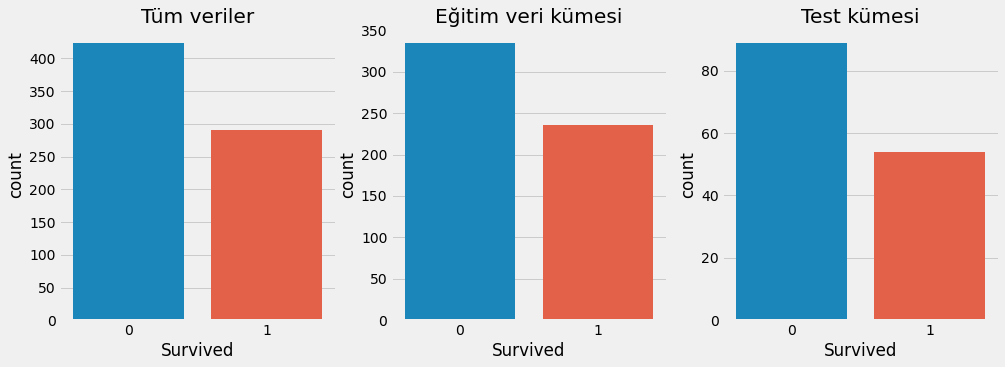

Tüm veri kümesi '0' yüzdesi : %59 
Test verisi '0' yüzdesi     : %62 
Eğitim verisi '0' yüzdesi   : %59 


In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(y)
plt.title("Tüm veriler")
plt.subplot(132)
sns.countplot(y_egitim)
plt.title("Eğitim veri kümesi")
plt.subplot(133)
sns.countplot(y_test)
plt.title("Test kümesi")
plt.show()
print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_egitim[y_egitim==0])/len(y_egitim)*100))

In [ ]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_egitim[y_egitim==0])/len(y_egitim)*100))

Tüm veri kümesi '0' yüzdesi : %59 
Test verisi '0' yüzdesi     : %59 
Eğitim verisi '0' yüzdesi   : %59 


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_egitim, y_egitim)
tahmin_eğitim = model.predict(X_egitim)
tahmin_test = model.predict(X_test)
model.score(X_test, y_test)

0.7832167832167832

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [ ]:
parcalar = kf.split(X)
for num, (eğitim_index, test_index) in enumerate(parcalar):
    print("{}.Eğitim Kümesi Boyutu : {}".format(num+1,len(eğitim_index)))
    print("{}.Test Kümesi Boyutu   : {}".format(num+1,len(test_index)))
    print('-'*27)

1.Eğitim Kümesi Boyutu : 571
1.Test Kümesi Boyutu   : 143
---------------------------
2.Eğitim Kümesi Boyutu : 571
2.Test Kümesi Boyutu   : 143
---------------------------
3.Eğitim Kümesi Boyutu : 571
3.Test Kümesi Boyutu   : 143
---------------------------
4.Eğitim Kümesi Boyutu : 571
4.Test Kümesi Boyutu   : 143
---------------------------
5.Eğitim Kümesi Boyutu : 572
5.Test Kümesi Boyutu   : 142
---------------------------


In [ ]:
from sklearn.metrics import mean_squared_error
model2 = LogisticRegression()
parcalar = kf.split(X)
dogruluk_liste = []
for i, (eğitim_indeks, test_indeks) in enumerate(parcalar):
    X_egitim, y_egitim = X[eğitim_indeks], y[eğitim_indeks]
    X_test, y_test = X[test_indeks], y[test_indeks]
    model2.fit(X_egitim, y_egitim)
    tahmin = model2.predict(X_test)
    dogruluk_degeri = model.score(X_test, y_test)  
    dogruluk_liste.append(dogruluk_degeri)
    print("{}.Parça Doğruluk Değeri: {:.3f}".format(i+1, dogruluk_degeri))
    print("-"*30)

KeyError: ignored

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score


In [ ]:
lrm = LogisticRegression()
cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Eğitim Skorları          : ', cv['train_score'], sep = '\n')

Test Skorları            : 
[0.80555556 0.73611111 0.80555556 0.83333333 0.69014085 0.8028169
 0.74647887 0.73239437 0.81690141 0.78873239]
--------------------------------------------------


KeyError: ignored

In [ ]:
logreg = LogisticRegression()
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 0.1, 'penalty': 'l2'}
En iyi skor         :  0.7786189358372456


In [ ]:
import pandas as pd

sonuçlar = grid_cv.cv_results_
df = pd.DataFrame(sonuçlar)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001770,0.001028,0.000000,0.000000,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.007179,0.000303,0.001190,0.000079,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.597222,0.555556,0.736111,0.694444,0.605634,0.647887,0.647887,0.647887,0.676056,0.633803,0.644249,0.048670,10
2,0.001051,0.000085,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,0.007441,0.000605,0.001228,0.000122,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.583333,0.583333,0.722222,0.750000,0.591549,0.661972,0.676056,0.647887,0.690141,0.633803,0.654030,0.054826,9
4,0.001043,0.000056,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [ ]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
9,l2,0.1,0.778619
11,l2,1,0.775802
13,l2,10,0.775802
15,l2,100,0.775802
17,l2,1000,0.775802
19,l2,10000,0.775802
7,l2,0.01,0.694718
5,l2,0.001,0.656827
3,l2,0.0001,0.654030
1,l2,1e-05,0.644249


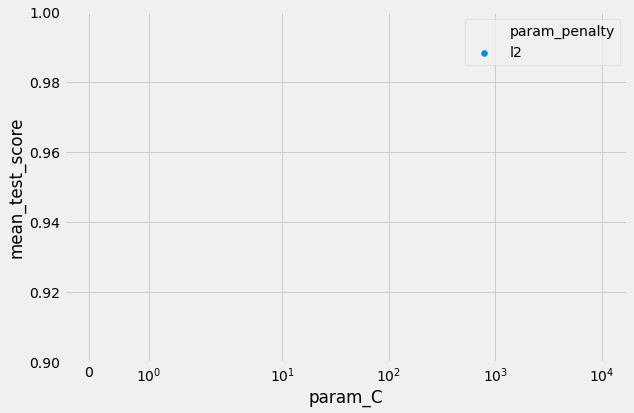

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.ylim((0.9,1))
plt.show()

In [ ]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=111, r

In [ ]:
print("En iyi parametreler        : ", rs_cv.best_params_)
print("Tüm hassasiyet değerleri   : ", rs_cv.cv_results_['mean_test_score'])
print("En iyi hassasiyet değeri   : ", rs_cv.best_score_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 10}
Tüm hassasiyet değerleri   :  [0.68913392 0.66708324 0.74379996 0.74379996        nan 0.74379996
        nan        nan        nan        nan]
En iyi hassasiyet değeri   :  0.7437999626989809


In [ ]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)

In [ ]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs

,param_penalty,param_C,mean_test_score
2,l2,10,0.743800
3,l2,1,0.743800
5,l2,1000,0.743800
0,l2,0.0001,0.689134
1,l2,0.001,0.667083
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,1e-05,NaN


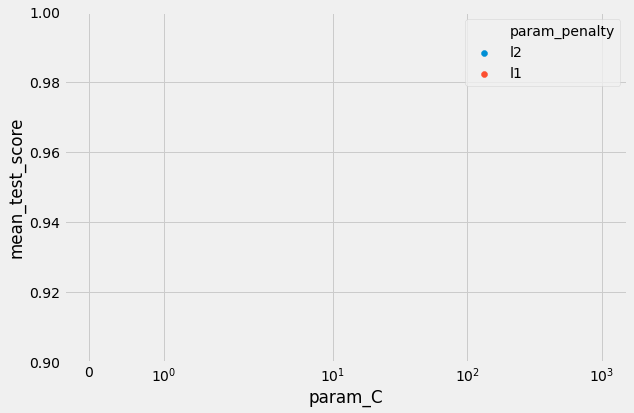

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.9,1))
plt.show()